# ANALIZA YOUTUBERJEV

Iz spletne strani <a href="https://socialblade.com/youtube/top/5000/mostsubscribed">podatki youtuberjev</a> sem pobrala podatke in jih zapisala v csv datoteko. Z analizo teh bom skušala ugotoviti povezavo med število vpisanih, ogledi, kategrijami ter oceno.

## Uvoz podatkov in osnovni pregled

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

Oglejmo si tabelo z vsemi podatki,ki je razvrščena po številu vpisanih. Iz nje lahko takoj dobimo nekaj zanimivih ugotovitev in povezav.

In [62]:
podatki = pd.read_csv('podatki.csv', index_col='mesto')
pd.options.display.max_rows = 20
podatki

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.00,87011278231
2,A,PewDiePie,entertainment,3991,102.00,23798731725
4,A++,Cocomelon - Nursery Rhymes,education,469,63.80,42092956470
8,A,5-Minute Crafts,howto,3748,61.70,16163442260
9,A++,SET India,entertainment,33302,58.40,42305090305
...,...,...,...,...,...,...
4996,A-,Rels B / Flakk Daniel,music,93,2.36,818038001
4997,A-,India Today,news,76371,2.36,599401124
4998,B,THIS PROJECT IS RETIRED,music,35,2.36,582783297


In [24]:
podatki[podatki.vpisani > 50.00].ime.count()

7

Le 7 kanalov ima več kot 50M vpisanih, oglejmo si še kako se spreminja število vpisanih. Iz spodnjega grafa je razvidno, da število na začetku zelo hitro pada potem pa se le manjo spreminja, ko pridemo nekje pod 10 M vpisanih.

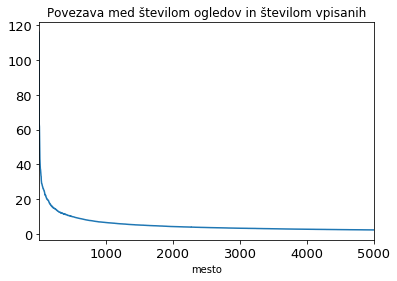

In [195]:
plt = podatki['vpisani'].plot(title=' Število vpisanih', fontsize=13)

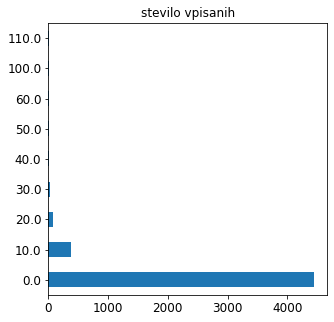

In [194]:
#zaokrozimo na 10 miljonov in preštejemo kanale v vsakem razdelku
podatki['zaokrozeni_vpisani'] = 10 * (podatki.vpisani // 10)
podatki['zaokrozeni_vpisani'].value_counts().plot(kind = 'barh', figsize=(5, 5), title='stevilo vpisanih', fontsize = '12')

To je potrdilo našo zgornjo ugotovitev, vidimo namreč, da več kot 4500 kanalov ima manj kot 10 M vpisanih.

In [25]:
podatki[podatki.ogledi > 10000000000 ].ime.count() 

91

## Razpored po ocenah

In [19]:
podatki.sort_values(['ogledi', 'ocena'], ascending=[False, True])

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.00,87011278231
9,A++,SET India,entertainment,33302,58.40,42305090305
4,A++,Cocomelon - Nursery Rhymes,education,469,63.80,42092956470
11,A+,WWE,sports,44227,50.20,36777154026
23,A++,Zee TV,entertainment,80479,36.90,34354338112
...,...,...,...,...,...,...
4527,A-,NextFlix,NaN,6,2.52,38879
4319,C+,Gjigandet e Vegjel,NaN,6,2.61,27582
3161,C,Тех.Обзор,people,12,3.23,27498


In [54]:
ocene = podatki.groupby('ocena')
ocene.size()

ocena
A       695
A+       32
A++       8
A-     1434
B       895
B+     1606
B-      125
C         5
C+       39
C-        1
D         2
D-       98
dtype: int64

Želimo izvedetei s kakšno oceno so večinoma ocenjeni kanali, ker je ocen veliko jih zberemo v štiri kategorije A, B, C, D.

In [57]:
ocena_A = podatki[(podatki.ocena == 'A')| (podatki.ocena == 'A+') | (podatki.ocena == 'A++') | (podatki.ocena == 'A-')]
ocena_B = podatki[(podatki.ocena == 'B')| (podatki.ocena == 'B+') | (podatki.ocena == 'B-')]
ocena_C = podatki[(podatki.ocena == 'C')| (podatki.ocena == 'C+') | (podatki.ocena == 'C-')]
ocena_D = podatki[(podatki.ocena == 'D')| (podatki.ocena == 'D-')]

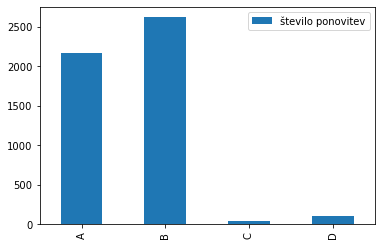

In [201]:
a = ocena_A.ime.count()
b = ocena_B.ime.count()
c = ocena_C.ime.count()
d = ocena_D.ime.count()

pogrupirana_ocena = {'A' : a,'B' : b,'C':c,'D':d }
graf = pd.DataFrame.from_dict(pogrupirana_ocena, 'index')
graf.columns = ['število ocenjenih']
graf.plot(kind = 'bar')


Tako lahko hitro opazimo, da je največ ocenjih z B takoj za tem pa z oceno A, kar je nekako pričakovan, da so kanali z največ vpisanimi tudi najbolj priljubljeni oz. dobro ocenjeni.

In [81]:
ocena_A[(podatki.vpisani > 50.00) &
        (podatki.ogledi > 10000000000)]

C:\Users\tanja\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.0,87011278231
2,A,PewDiePie,entertainment,3991,102.0,23798731725
4,A++,Cocomelon - Nursery Rhymes,education,469,63.8,42092956470
8,A,5-Minute Crafts,howto,3748,61.7,16163442260
9,A++,SET India,entertainment,33302,58.4,42305090305
10,A+,Canal KondZilla,music,1213,52.9,26950843861
11,A+,WWE,sports,44227,50.2,36777154026


In [94]:
ocena_D

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
112,D-,The Late Late Show with James Cord…,entertainment,3663,20.80,6427238448
170,D-,Amit Bhadana,entertainment,64,17.00,1268368226
218,D,Michael Jackson,music,1,15.10,262345
387,D-,Blossom,howto,271,11.40,3007736253
410,D-,HiMan,people,143,11.10,783665179
...,...,...,...,...,...,...
4471,D-,Vasya - Nursery Rhymes &amp; Kids Songs,NaN,58,2.54,421706131
4630,D-,Chance and Anthony,NaN,5,2.48,9941215
4674,D-,Tatiana,music,497,2.47,1116564802


Iz prve tabele opazimo, da so med prvimi desetimi vsi ocenjeni z A.Iz druge tabele, pa lahko razberemo, da na prvih sto mestih ni noben kanal ocenjen z najslabšo oceno D. To še dodatno potrjuje, da so tisti kanali z več vpisanimi tudi bolje ocenjeni.


## Povezava med objavami ter kategorijami

Želimo ugotovit ali je število objav povezano s številom vpisanih, ter s čim je povezano število objav.
Najprej poglejmo koliko je najpogosteje število objav, za boljšo preglednost pogledamo le do 15 000. Opazimo da večinakanalov ima manj kot 1000 objav.

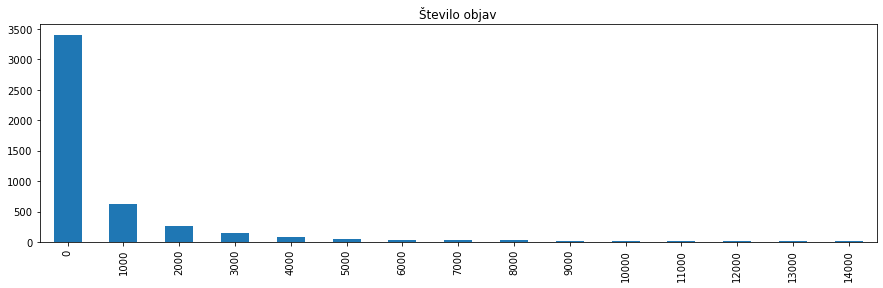

In [216]:
# pogrupiramo število objav na 1000
podatki['zaokrozene_objave'] = 1000 * (podatki.objave // 1000)
odstranimo_najvecje = podatki[podatki.objave < 15000]
odstranimo_najvecje['zaokrozene_objave'].value_counts().sort_index(ascending=True).plot(kind = 'bar', figsize=(15, 4), title='Število objav')


In [164]:
aktivni_youtuberji = podatki[podatki.objave > 100000]
aktivni_youtuberji

,ocena,ime,kategorija,objave,vpisani,ogledi,zaokrozene_objave
mesto,,,,,,,
92,A++,ABS-CBN Entertainment,entertainment,131964,22.60,31129203571,131000
106,A,TEDx Talks,nonprofit,143636,21.50,3853733551,143000
174,A,ABP NEWS,news,131685,16.90,4146718113,131000
204,A,IndiaTV,news,142573,15.50,5402333029,142000
315,A,IGN,games,135087,12.50,9567019192,135000
...,...,...,...,...,...,...,...
3597,A,SBS Entertainment,entertainment,206261,2.96,2377381729,206000
4112,A-,VideoYoum7 | قناة اليوم �…,news,106510,2.70,1136024874,106000
4294,A,SBS Drama,entertainment,339825,2.63,2538927806,339000


V zgornji razpredelnici so prikazani tisti kanalo ki imajo nadpovprečno število objav. Presentljivo je dejstvo, da ima najbolj aktiven kanal več kot 130 000 objav, kar je 130-krat več kot povprečen kanal. Opazimo tudi, da mesta, ki jih dosegajo kanali z več objavami niso ravno visoka. Iz tega sklepamo, da večje število objav ne zagotovitudi več vpisanih.

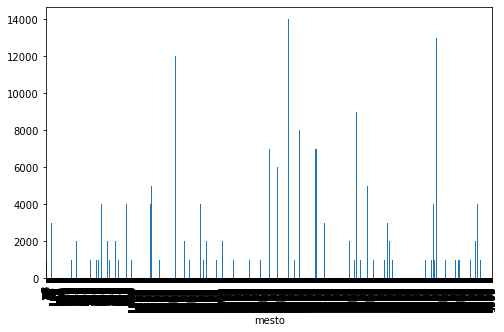

In [224]:
odstranimo_najvecje = podatki[podatki.objave < 15000]
odstranimo_najvecje['zaokrozene_objave'].plot(kind = 'bar', figsize=(8, 5))

Če pogledamo kakšna je poevzava med aktivnejšimi kanali ter kategorijami, opazimo, da so to večinoma kanali z novicami. Če premislimo je razlog očiten, saj novice objavljajo vsak dan, povprečen kanal pa nekje enkrat na teden. Tako lahko sklepamo, da je število objav tesneje povezano z kategorijo, kot pa s številom vpisanih (posledično mestom na lestvici).

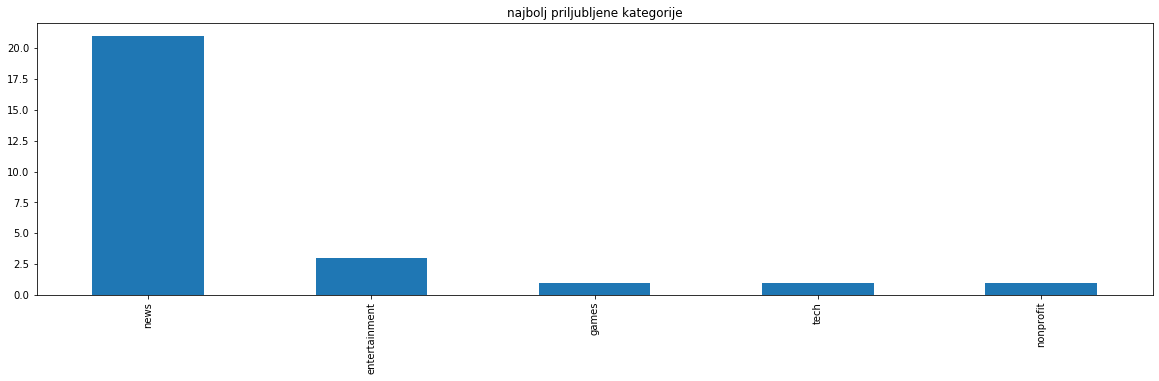

In [150]:
aktivni_youtuberji['kategorija'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 5), title='najbolj priljubljene kategorije')

Zanimiv je tudi podatek o tem, katere kategorije so najbolj pogoste. Največkrat se pojavi *entertainment*, najverjetneje so tu vsi kanali, ki jih težko razporedimo v neko specifično kategorijo, zato je teh največ.

In [80]:
najpogostejše_kategorije = podatki.groupby('kategorija')
najpogostejše_kategorije.size().to_frame('pojavitev')

,pojavitev
kategorija,
animals,14
autos,27
comedy,332
education,198
entertainment,1340
film,242
games,515
howto,260
music,887


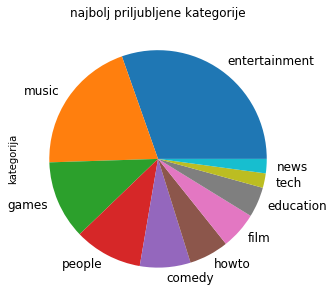

In [79]:
podatki['kategorija'].value_counts().head(10).plot(kind = 'pie',  figsize=(5, 5), title='najbolj pogoste kategorije', fontsize = '12')

Če pogledamo samo tiste kanale z največ vpisanimih se prav tako največkrat pojavita katrgoriji *music* in *entertainment*.

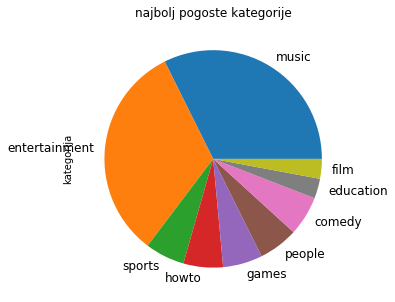

In [225]:
prvi = podatki[podatki.vpisani > 30.00]
prvi['kategorija'].value_counts().head(10).plot(kind = 'pie',  figsize=(5, 5), title='najbolj priljubljene kategorije', fontsize = '12')

## Odvisnost od števila ogledov

Preverimo še ali je res večje število ogledov povezano z večjim številom vpisanimih. Opazimo takoj, da ima kanal na prvem mestu tudi največ ogledov. Preverimo ali je to le naključje.

In [114]:
podatki['ogledi'].max()

87011278231

In [176]:
podatki[['ime', 'ogledi']].head(20)

,ime,ogledi
mesto,,
1,T-Series,87011278231
2,PewDiePie,23798731725
4,Cocomelon - Nursery Rhymes,42092956470
8,5-Minute Crafts,16163442260
9,SET India,42305090305
10,Canal KondZilla,26950843861
11,WWE,36777154026
12,Justin Bieber,635628175
13,Dude Perfect,9179627072


Text(0, 0.5, 'število ogledov')

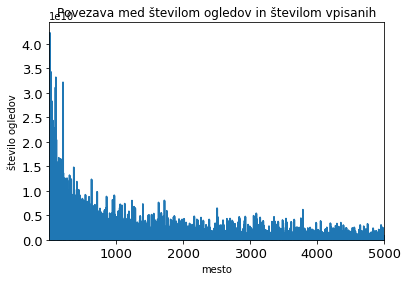

In [226]:
#odstranimo najbolj gledan kanalsaj ta zelo odstopa od ostalih in bo brez teg graf bol pregleden
odstranimo_ekstreme = podatki[(podatki.ogledi < 87011278231)]
plt = odstranimo_ekstreme['ogledi'].plot(kind = 'area', title='Povezava med številom ogledov in številom vpisanih', fontsize=13)
plt.set_xlabel("mesto")
plt.set_ylabel("število ogledov")

Iz grafa opazimo, da imajo kanali višje na lestvici tudi več vpisanih, seveda pa so tudi izjeme.

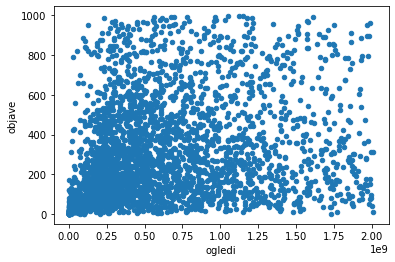

In [233]:
odstranimo_ekstreme2 = podatki[(podatki.objave < 1000) & (podatki.ogledi < 2011278231)]
odstranimo_ekstreme2[['ogledi', 'objave']].plot.scatter('ogledi', 'objave')

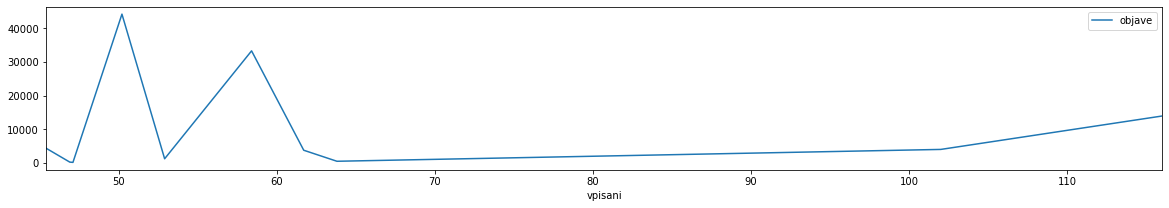

In [180]:
prvih_10 = podatki.head(10)
podatki_vpisani = prvih_1000.groupby('vpisani')
podatki_vpisani[['objave']].mean().plot(figsize=(20, 3))